In [1]:
#NAME: - Sarvesh Reshimwale
#MIS: - 20CO105
#DA PROJECT
#PROBLEM STATEMENT: - ANALYSIS OF THE HYPERBOLIC MEYER GROUP COMET BELT TRAJECTORY AND CALCULATION OF ITS CLOSEST APPROACH TO SUN and verification of closest approach to be of 0.148Au

# 1. Reading the data of csv file using numpy and importing the libraries required

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf
Time, Distance, Angle = np.loadtxt(r'/Users/sarveshreshimwale/Downloads/Comet_Data_1.csv',delimiter=',')
import math






# 2. Calculation of the distance of the comet from stationary earth reference

In [5]:
New_Distance = []
for h in range( len(Time)):
    if(abs(Angle[h]) < 1.57079633):
        Distance_square = np.square(Distance[h])
        s = np.sin(Angle[h])
        o = np.cos(Angle[h])
        sine = np.square(s)
        cosine = np.square(o)
        Distance_times_cos = np.multiply(Distance[h], o)
        c = 2*Distance_times_cos
        k = np.multiply(sine, Distance_square)
        a = np.add(k, Distance_square)
        b = np.add(c, cosine)
        d = np.add(a, b)
        f = np.sqrt(d)
        New_Distance.append(f)
    elif(abs(Angle[h]) > 1.57079633):
        w = 1/math.sin(Angle[h])
        v = 1/math.tan(Angle[h])
        t = math.atan((w/Distance[h]) - v)
        l = math.cos(t)
        Distance_square = np.square(Distance[h])
        g = np.sqrt(Distance_square - l**2)
        n = np.sqrt(1 - l**2)
        m = g + n
        New_Distance.append(f)
New_Distance = np.array(New_Distance)
print(New_Distance) #this is the final distance of the comet to sun with earth as stationary


[ 1.97695757  2.37934504  2.91972202  3.55404808  4.15434468  4.5960192
  4.89507862  5.18935566  5.5788724   5.8628259   5.68386103  5.68386103
  5.68386103  5.68386103  5.68386103  5.68386103  8.23161829  8.59496407
  8.32517492  8.39510703  9.23709205 10.02773301 10.02773301 10.02773301
 10.02773301 10.02773301 10.02773301 10.02773301 12.12995484 11.53365254
 10.85545556 11.55181891 13.01364935 13.48604502 13.48604502 13.48604502
 13.48604502 13.48604502 13.48604502 15.191553   14.62282085 13.22028747
 13.41695927 15.2243456  16.45535844 16.45535844 16.45535844 16.45535844
 16.45535844 16.45535844 17.84313974 17.46973275 15.63955622 15.19876833
 17.05521035 18.96775666 18.96775666 18.96775666 18.96775666 18.96775666
 18.96775666 18.96775666 20.23536249 18.04193096 16.80170788 18.5493426
 21.0228849  21.0228849  21.0228849  21.0228849  21.0228849  21.0228849
 21.0228849  22.68085995 20.35672522 18.45744341 19.770327   22.80018219
 23.77777443 23.77777443 23.77777443 23.77777443 23.77

# 3. Calculation of the conic section plot with its eccentricities 

In [6]:
j = 2*(np.pi)
Angle_Earth= []
for i in Time:
    Angle_Swept = i*j
    Angle_Earth.append(Angle_Swept)
Angle_Earth = np.array(Angle_Earth)
def conic_Section_Co0ordinates(Angle, Distance, Angle_Earth):
    x = []
    y = []
    for i in range(len(Angle)):
        u = Distance[i] * np.cos(Angle[i])
        v = 1-Distance[i] * np.sin(Angle[i])
        Earths_Rotation_Matrix = [[np.cos(Angle_Earth[i]), -np.sin(Angle_Earth[i])], [np.sin(Angle_Earth[i]),np.cos(Angle_Earth[i])]]
        Comet_Cordinates = [u,v]
        New_Comet_Cordinates = np.matmul(Earths_Rotation_Matrix, Comet_Cordinates)
        x.append(New_Comet_Cordinates[0])  
        y.append(New_Comet_Cordinates[1]) 
    x = np.array(x)
    y = np.array(y)
    return x,y



# 4. Calculation of the Space cordinates f the comet with respect to sun

In [7]:
def Space_Coordinates(Angle, Distance, Angle_Earth):
    x = []
    y = []
    for i in range(len(Angle)):
        u = 1-Distance[i] * np.cos(Angle[i])
        v = Distance[i] * np.sin(Angle[i])
        Earths_Rotation_Matrix = [[np.cos(Angle_Earth[i]), -np.sin(Angle_Earth[i])], [np.sin(Angle_Earth[i]),np.cos(Angle_Earth[i])]]
        Comet_Cordinates = [u,v]
        New_Comet_Cordinates = np.matmul(Comet_Cordinates, Earths_Rotation_Matrix)
        x.append(New_Comet_Cordinates[0])  
        y.append(New_Comet_Cordinates[1]) 
    x = np.array(x)
    y = np.array(y)
    return x,y

# 5. Plot of the conic section curve 

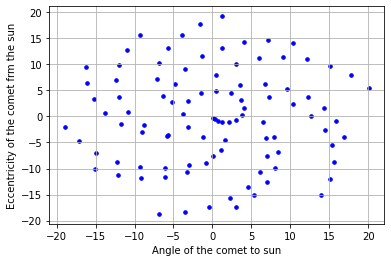

In [8]:
x,y = conic_Section_Co0ordinates(Angle, Distance, Angle_Earth)
plt.scatter(x,y,s=50, color='b', marker='.')
plt.ylabel('Eccentricity of the comet frm the sun')
plt.xlabel('Angle of the comet to sun')
plt.grid()
plt.show()


In [9]:
# SINCE THIS WHIRLPOOL IS A CLOSD FIGURE ORIGINATING FROM ONE POINT AND REVOLVING AROUND THAT ONLY. THIS FIGURE IS THEREFORE  
# REPRESENTS THE CONIC SECTIONS THAT CAN BE FORMED ARE EITHER ELLIPSE OR HYPERBOLA

# 6. Plot of the path of the comet with respect to the sun

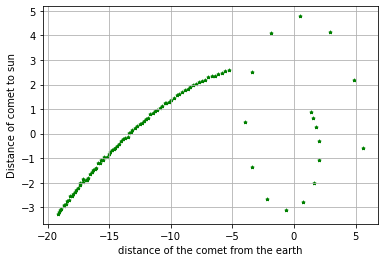

In [25]:
y,x = Space_Coordinates(Angle, Distance, Angle_Earth)
plt.scatter(x,y,s=10, color='g', marker='*')
plt.ylabel('Distance of comet to sun')
plt.xlabel('distance of the comet from the earth')
plt.grid()
plt.show()

# 7. Figuring out the conic section equation of the trajectory of the comet with sun at one foci

In [11]:
#curve fitting function using SciPy optimization
#Deterintion of the conic equation
X=[]
Y=[]
for i in range(len(x)):
    X.append([x[i]])
    Y.append([y[i]])
X = np.array(X)
Y = np.array(Y)
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
m = np.linalg.lstsq(A,b)[0] #minimizes using least squares
print('The conic is {}x^2 - {}xy + {}y^2 + {}x +{}y - 1 = 0'.format(m[0],np.abs(m[1]),m[2],m[3],m[4]))


The conic is 0.0888x^2 - 0.0494xy + 0.0127y^2 + -0.105x +0.0941y - 1 = 0


<ipython-input-11-d00a9a16f172>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(A,b)[0].squeeze() #minimizes using least squares


# 8. Calculation of the eccentricity of the conic section

In [12]:
#calculates eccentricity of the final curve
determinant=np.array([[m[0],m[1]/2,m[3]/2],[m[1]/2,m[2],m[4]/2],[m[3]/2,m[4]/2,-1]])
eta=1
if np.linalg.det(determinant)<0:
    eta=1
else:
    eta=-1
eccentricity=np.sqrt(2*np.sqrt((m[0]-m[2])**2+m[1]**2)/(eta*(m[0]+m[2])+np.sqrt((m[0]-m[2])**2+m[1]**2)))
print("The eccentricity is ",eccentricity) #determine eccentricty of the section by the general formula

The eccentricity is  0.9717161288731567


# 9. Calculation of the distance of the comet from the sun and sorting out the array to calculate the closest approach 

In [13]:
y_array = np.array(y)
modulus_y_array = np.abs(y_array)
Sorted_y_array = np.sort(modulus_y_array)
print(Sorted_y_array)

[ 0.4621273   0.65865654  0.7138274   1.34314787  1.53441444  1.62159794
  1.7844896   1.87642499  2.01111565  2.02157126  2.199022    2.93605385
  3.43854291  3.44039233  3.93608964  4.86735005  5.26404491  5.56323502
  5.56611472  5.85620893  6.13816662  6.4177555   6.68331587  6.94032373
  7.20370477  7.44189856  7.68855719  7.93853124  8.15573598  8.40780923
  8.63384121  8.86568004  9.08815619  9.30083396  9.51422576  9.73708851
  9.94391035 10.1483151  10.35254089 10.50450419 10.74938803 10.8860775
 11.0917625  11.26908359 11.4507856  11.7077421  11.87051216 11.98143401
 12.16707061 12.36867838 12.52274138 12.71466574 12.8793954  13.10784682
 13.2182039  13.36057685 13.50386544 13.69926735 13.87522245 14.0296378
 14.18202147 14.35470567 14.51577804 14.6231536  14.78442737 14.93351179
 15.03160864 15.16134827 15.38716561 15.50914449 15.63075131 15.73148263
 15.92388494 16.06727019 16.13223744 16.33509524 16.42742651 16.58371311
 16.69311507 16.82283436 16.8992478  17.08807905 17.1

# 10. Conclusion

In [14]:
print("Answer: The comet follows the trajectory of a {} and it's closest approach to the sun is {}Au".format('Hyperbola', Sorted_y_array[0]) )

Answer: The comet follows the trajectory of a Hyperbola and it's closest approach to the sun is 0.46212730166669935Au
